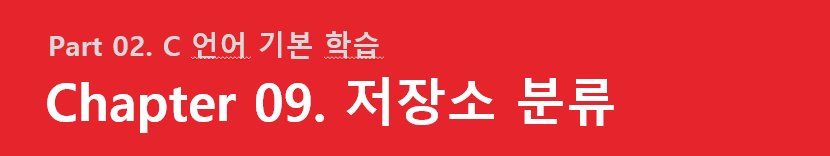  
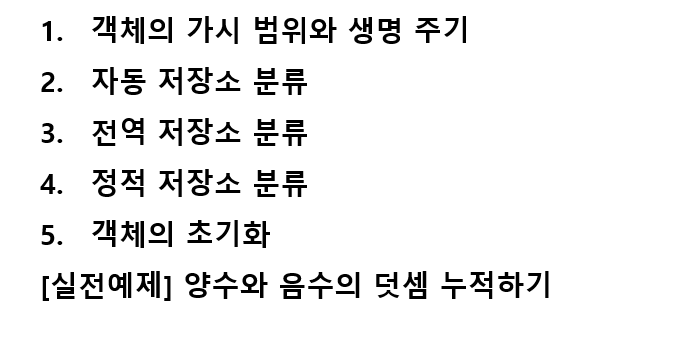

# <font color=red>01.</font> 객체의 가시 범위와 생명 주기

<hr style="border:none;border-top:3px dotted #000;margin-left:0;" align=left size=2 width=50% /> 

## <font color=red>1.</font> **`객체의 가시 범위`**

### <font color=ref>[코드 9-1] 함수 안에서 사용한 객체의 사용</font>
```c
#include <stdio.h>
void func(){
    int b = 3;
    int brr[1] = { 4 };
    printf("%d", a);       //오류: 변수 범위 초과
    printf("%d", arr[0]);  //오류: 변수 범위 초과
}
int main(){
    int a = 1;
    int arr[1] = {2};
    func();
    printf("%d", b);      //오류: 변수 범위 초과
    printf("%d", brr[0]); //오류: 변수 범위 초과
}
```
    

In [ ]:
지역변수 = 자동변수 * func 안에 함수 중괄호 안에 있는 변수는 중괄호 안에서만 사용됨

## <font color=red>1.</font> **`지역 객체의 가시 범위`**

### <font color=ref>[코드 9-2] 변수가 모든 함수에서 사용 가능한 경우(1)</font>
```c
#include <stdio.h>
void not(int arg){
    int a = !arg;
    return a;
}
int main(){
    int a = 0;
    int b = not(a);
    
    printf("%d -> %d", a,b); 
}
```

<hr width=50% style="margin-left:0px;border-top:3px dotted #a50000;" />

**`결과`**
<font color=red>0 -> 1</font>
    

In [ ]:
a >> 자동변수이기에 이름은 다르지만 메인함수 a와 not 함수 안에 a는 다르다.

### <font color=ref>[코드 9-3] 변수가 모든 함수에서 사용 가능한 경우(2)</font>
```c
#include <stdio.h>
void f(){
    int a = 1;    
}
void g(){
    int a = 2;    
}
int main(){
    f();
    g();
    
    printf("%d", a); 
}
```

<hr width=50% style="margin-left:0px;border-top:3px dotted #a50000;" />

**`결과`**
<font color=red>에러</font>
    

In [1]:
#include <stdio.h>
void f(){
    int a = 1;
}
void g(){
    int a = 2;
}
int main(){
    //int a = 3;
    f();
    g();
    printf("%d",a);
}

/tmp/tmp47v0svgq.cpp: In function ‘int main()’:
/tmp/tmp47v0svgq.cpp:14:17: error: ‘a’ was not declared in this scope
   14 |     printf("%d",a);
      |                 ^

[C++ kernel] Error: Unable to compile the source code. Return error: 0x1.

## 전역 객체의 가시 범위

### <font color=ref>[코드 9-4] 전역객체(변수, 배열)</font>
```c
#include <stdio.h>
int g = 1;
int garr[1] = {1};

void func(){
    g++;
    garr[0]++;
}

int main(){
    printf("Before: %d, %d\n", g, garr[0]);
    func();
    printf("After: %d, %d\n", g, garr[0]);    
}
```

<hr width=50% style="margin-left:0px;border-top:3px dotted #a50000;" />

**`결과`**
<font color=red><br>Before: 1, 1<br>After: 2, 2</font>
    

In [ ]:
전역변수는 초기화하지 않으면 0으로 자동 초기화됨.

In [2]:
#include <stdio.h>
int g = 1;
int garr[1] = {1}; // 전역변수

void func(){
    g++;
    garr[0]++;
}
int main(){
    printf("Before: %d, %d\n",g,garr[0]);
    func();
    printf("After: %d, %d\n",g,garr[0]);
    return 0;
}


Before: 1, 1

After: 2, 2



In [ ]:
지역변수 vs 전역변수

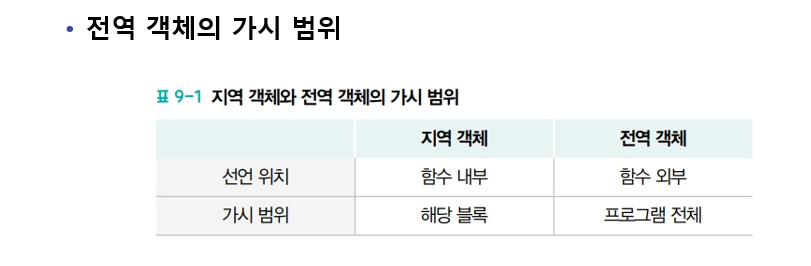

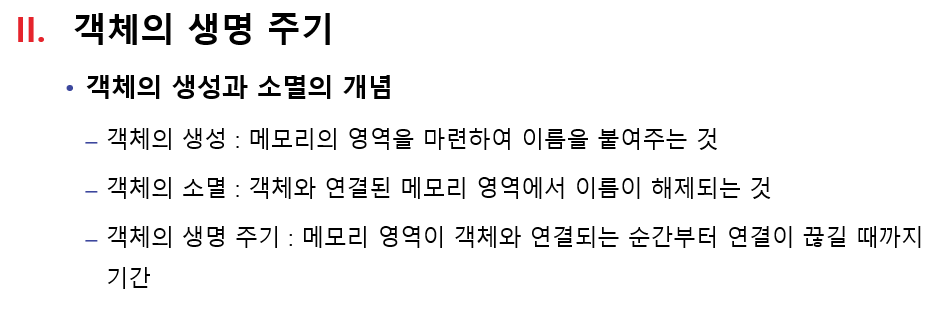

### <font color=ref>[코드 9-5] 객체의 생명 주기 - 메모리 재활용</font>
```c
#include <stdio.h>
void f(){
    int a[1] = {7};
    printf("%d\n", a[0]);
}
void g(){
    int b[1];     // 초기화 안 됨
    printf("%d\n", b[0]);
}

int main(){
    f();
    g();
}
```

<hr width=50% style="margin-left:0px;border-top:3px dotted #a50000;" />

**`결과`**
<font color=red><br>7<br>0</font>
    

In [ ]:
#include <stdio.h>
void f(){
    int a[1] = {7};
    printf("%d\n",a[0]);
}
void g(){
    int b[1];
    printf("%d\n",b[0]);
}
int main(){
    f();
    g();
    return 0;    
}


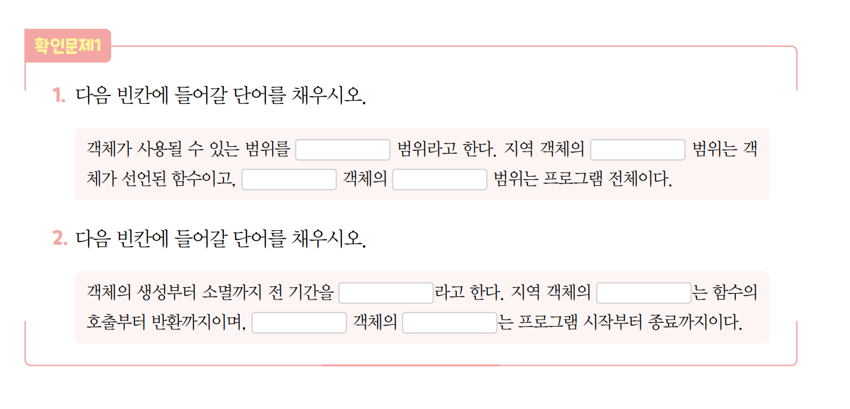  
1.<span style="color:gray;font-size:17px;">가시, 가시, 전역, 가시</span><br>
2.<span style="color:gray;font-size:17px;">생명주기, 생명주기, 전역, 생명주기</span><br>

In [ ]:
지역 변수의 생명주기 : 함수의 호출부터 반환
전역 변수의 생명주기 : 프로그램 시작부터 종료

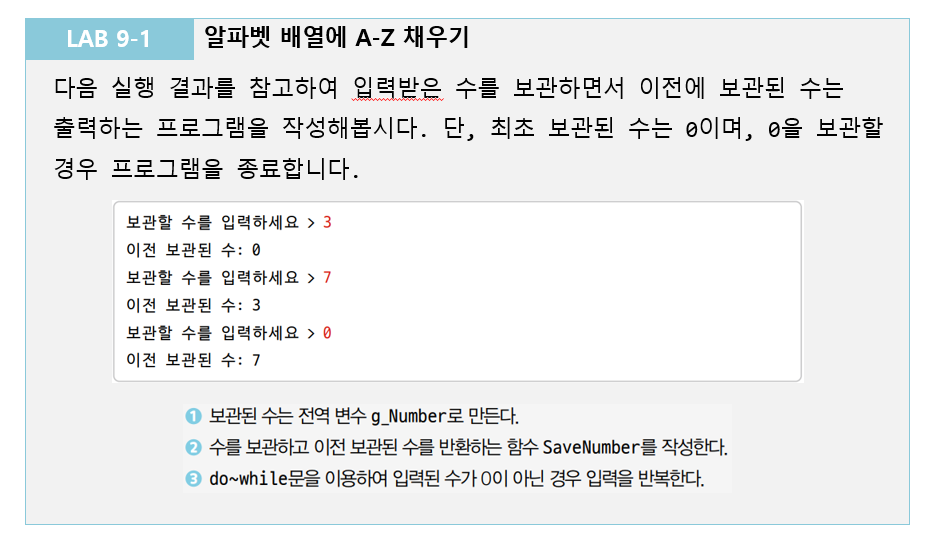  


In [ ]:
// 파일명: lab9-1.c
#include <stdio.h>

int g_Number = 0;

int SaveNumber(int n)
{
   int r = g_Number;
   g_Number = n;
   return r;
}

int main( )
{
   int n;
   do
   {
      printf("보관할 수를 입력하세요 > ");
      scanf("%d", &n);

      printf("이전 보관된 수: %d\r\n", SaveNumber(n));
   } 
   while(n);
}


In [3]:
// 파일명: lab9-1.c
#include <stdio.h>

int g_Number = 0;

int SaveNumber(int n)
{
   int r = g_Number;
   g_Number = n;
   return r; // 지역변수 출력(함수 호출부터 선언까지), 전역변수 저장(프로그램 실행부터 끝날때까지 살아있음)
}

int main( )
{
   int n;
   do
   {
      printf("보관할 수를 입력하세요 > ");
      scanf("%d", &n);

      printf("이전 보관된 수: %d\r\n", SaveNumber(n));
   } 
   while(n);
}


보관할 수를 입력하세요 > 

 5


이전 보관된 수: 0

보관할 수를 입력하세요 > 

 5


이전 보관된 수: 5

보관할 수를 입력하세요 > 

 0


이전 보관된 수: 5



In [9]:
// 1. 이전의 입력된 값을 출력 2. 이전의 값과 현재값을 더해서 출력
#include <stdio.h>

int g_Number = 0;
int g_sum = 0;

int SaveNumber(int n)
{
    int r = g_Number; // r에다가 g_number 넣기  r = 0
    g_Number = n; // g_number에 n 넣기 n = 5
    g_sum += g_Number;
    return r; // 지역변수 출력(함수 호출부터 선언까지), 전역변수 저장(프로그램 실행부터 끝날때까지 살아있음)
}

int main( )
{
   int n;
   do
   {
      int tmp;
      printf("보관할 수를 입력하세요 > ");
      scanf("%d", &n);
      tmp = SaveNumber(n);
      printf("이전 보관된 수: %d\r\n , 처음부터 현재까지 더한 값: %d\n", tmp, g_sum);
   } 
   while(n);
}


보관할 수를 입력하세요 > 

 2


이전 보관된 수: 0

 , 처음부터 현재까지 더한 값: 2

보관할 수를 입력하세요 > 

 3


이전 보관된 수: 2

 , 처음부터 현재까지 더한 값: 5

보관할 수를 입력하세요 > 

 0


이전 보관된 수: 3

 , 처음부터 현재까지 더한 값: 5



In [16]:
//배열 5요소 // 1. 이전의 입력된 값을 출력 2. 이전의 값과 현재값을 더해서 출력 // 지역변수
#include <stdio.h>

int g_Number = 0;
int g_sum = 0;

int SaveNumber(int n)
{
    int r = g_Number; // r에다가 g_number 넣기  r = 0
    g_Number = n; // g_number에 n 넣기 n = 5
    g_sum += g_Number;
    return r; // 지역변수 출력(함수 호출부터 선언까지), 전역변수 저장(프로그램 실행부터 끝날때까지 살아있음)
}

int main( )
{
    int n;
    int arr[5];
    for(int i = 0; i < 5 ; i++){
        int tmp;
        printf("보관할 수를 입력하세요 > ");
        scanf("%d", &n);        
        arr[i] = n;
        tmp = SaveNumber(n);
        printf("이전 보관된 수: %d\r\n , 처음부터 현재까지 더한 값: %d\n ,  ", tmp, g_sum);
   }
    for(int i = 0; i < 5; i++) printf("%d +", arr[i]);
        printf("%d = %d",arr[4], g_sum);
    
}


보관할 수를 입력하세요 > 

 1


이전 보관된 수: 0

 , 처음부터 현재까지 더한 값: 1

 ,  보관할 수를 입력하세요 > 

 2


이전 보관된 수: 1

 , 처음부터 현재까지 더한 값: 3

 ,  보관할 수를 입력하세요 > 

 3


이전 보관된 수: 2

 , 처음부터 현재까지 더한 값: 6

 ,  보관할 수를 입력하세요 > 

 4


이전 보관된 수: 3

 , 처음부터 현재까지 더한 값: 10

 ,  보관할 수를 입력하세요 > 

 5


이전 보관된 수: 4

 , 처음부터 현재까지 더한 값: 15

 ,  1 +2 +3 +4 +5 +5 = 15

In [17]:
//배열 5요소 // 1. 이전의 입력된 값을 출력 2. 이전의 값과 현재값을 더해서 출력 // 전역변수
#include <stdio.h>

int g_Number = 0;
int g_sum = 0;
int arr[5];
int g_i = 0;

int SaveNumber(int n)
{
    int r = g_Number; // r에다가 g_number 넣기  r = 0
    g_Number = n; // g_number에 n 넣기 n = 5
    arr[g_i++] = g_Number;
    g_sum += g_Number;
    return r; // 지역변수 출력(함수 호출부터 선언까지), 전역변수 저장(프로그램 실행부터 끝날때까지 살아있음)
}

int main( )
{
    int n;
    //int arr[5]; 전역
    for(int i = 0; i < 5 ; i++){
        int tmp;
        printf("보관할 수를 입력하세요 > ");
        scanf("%d", &n);        
        //arr[i] = n;
        tmp = SaveNumber(n);
        printf("이전 보관된 수: %d\r\n , 처음부터 현재까지 더한 값: %d\n ,  ", tmp, g_sum);
   }
    for(int i = 0; i < 5; i++) printf("%d +", arr[i]);
        printf("%d = %d",arr[4], g_sum);
    
}


보관할 수를 입력하세요 > 

 1


이전 보관된 수: 0

 , 처음부터 현재까지 더한 값: 1

 ,  보관할 수를 입력하세요 > 

 2


이전 보관된 수: 1

 , 처음부터 현재까지 더한 값: 3

 ,  보관할 수를 입력하세요 > 

 3


이전 보관된 수: 2

 , 처음부터 현재까지 더한 값: 6

 ,  보관할 수를 입력하세요 > 

 4


이전 보관된 수: 3

 , 처음부터 현재까지 더한 값: 10

 ,  보관할 수를 입력하세요 > 

 5


이전 보관된 수: 4

 , 처음부터 현재까지 더한 값: 15

 ,  1 +2 +3 +4 +5 +5 = 15

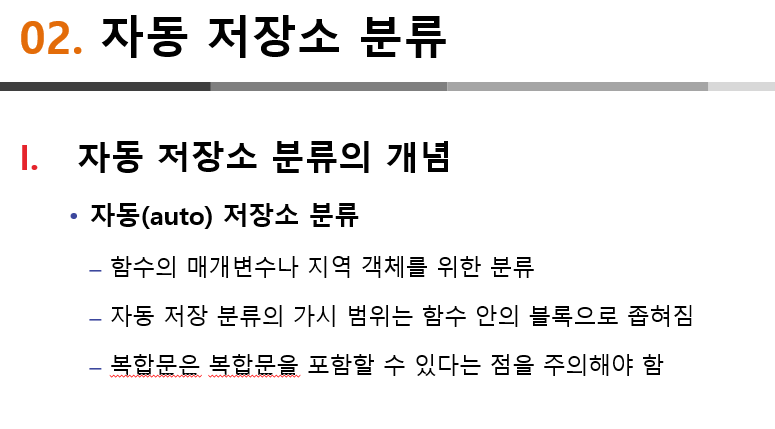  
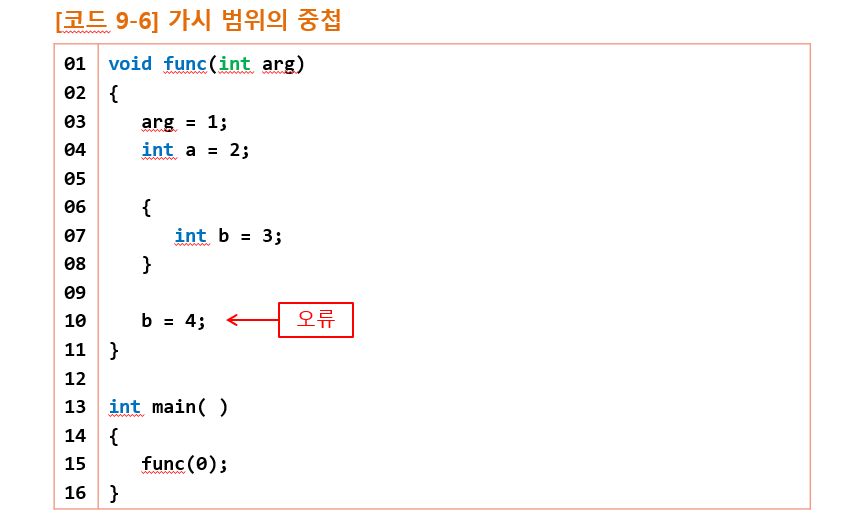

In [ ]:
자동변수(지역변수)는 블록 내에서 적용

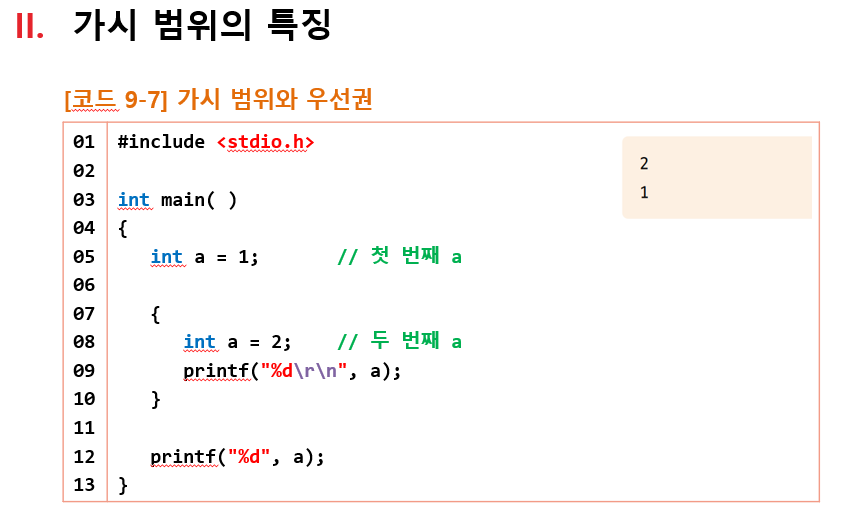

## 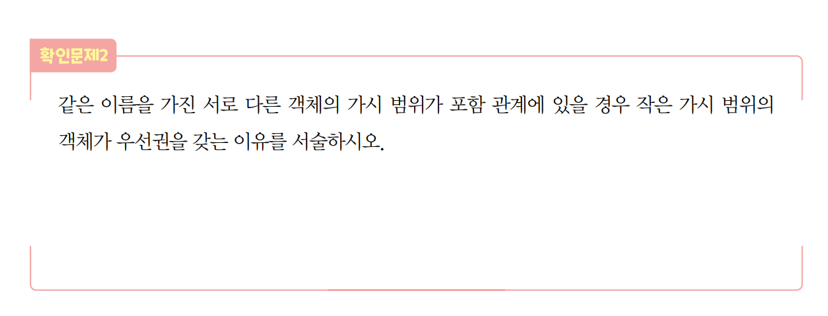  
*<span style="color:white;font-size:17px;">큰 가시 범위의 객체가 우선권을 가진다면 작은 가시 범위의 객체는 이름을 통해서 사용될 수가 없기 때문이다.</span>

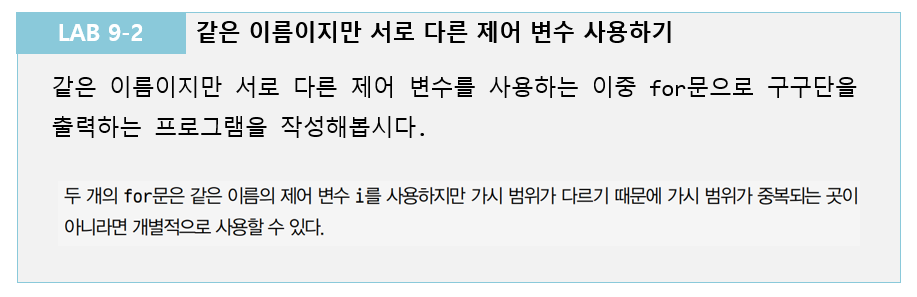  


In [ ]:
// lab7-2.c
#include <stdio.h>
int main()
{
   int r;

   for(int i = 2; i < 10; i++)
   {
      r = i;
      for(int i = 1; i < 10; i++)
      {
         printf("%d * %d = %d\r\n", r, i, r * i);
      }
      printf("\r\n");
   }
}


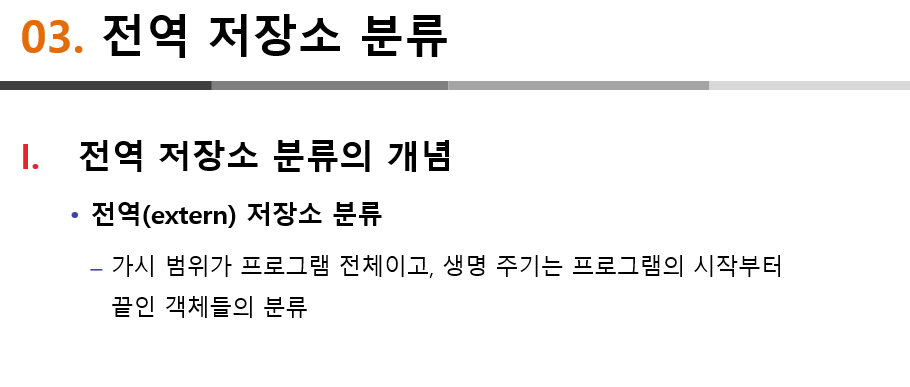  
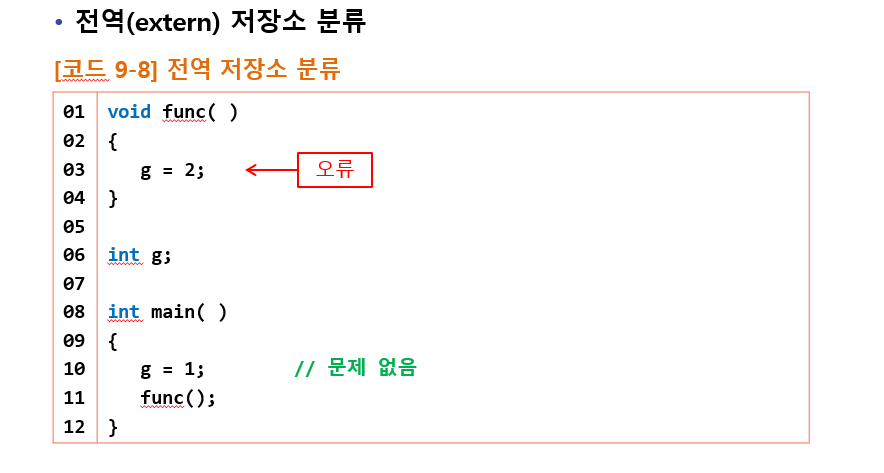

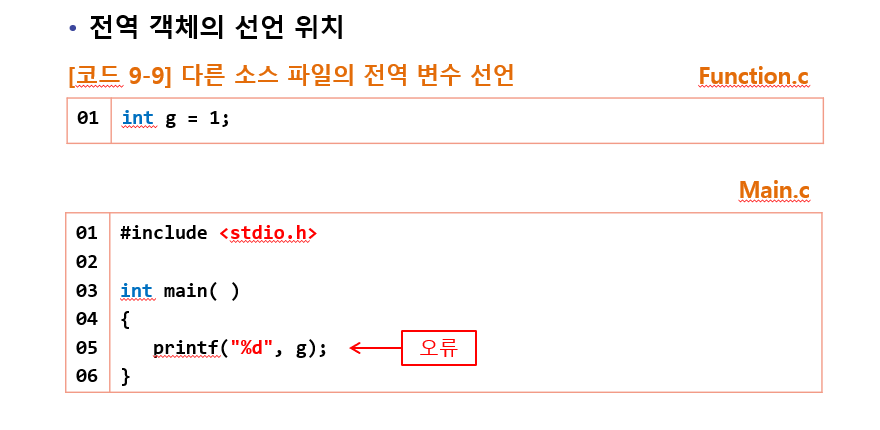

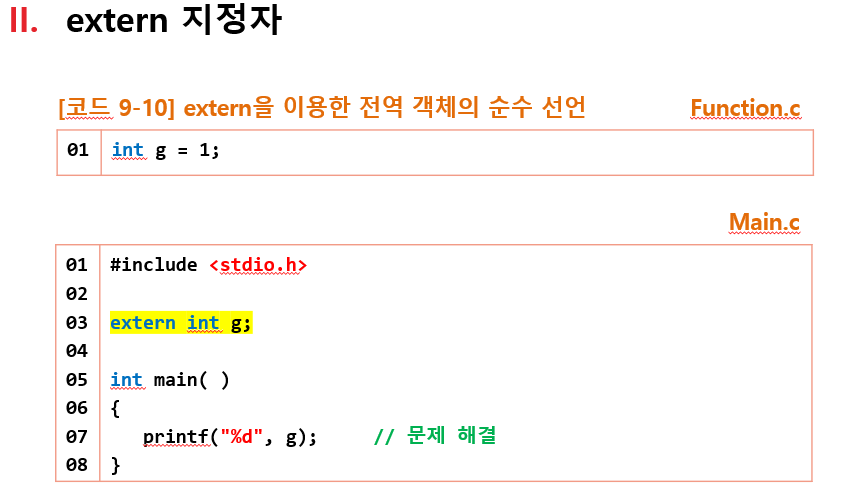  
# 위 코드를 실행하는 방법(Main.c 코드를 수정)
```c
#include <stdio.h>
extern int g;
int main(){
    printf("extern int g: %d", g);
    return 0;
}
```

## <a href="lecture9-3-전역저장소.ipynb"><font color='red'>lecture9-3-전역저장소.ipynb</font> 파일 참조</a>

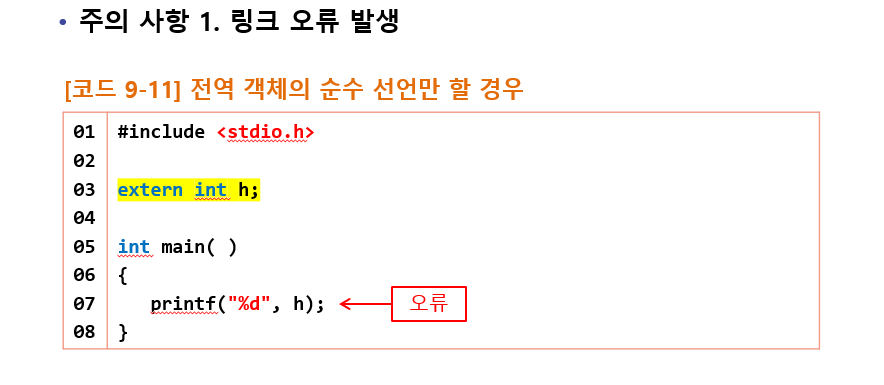  
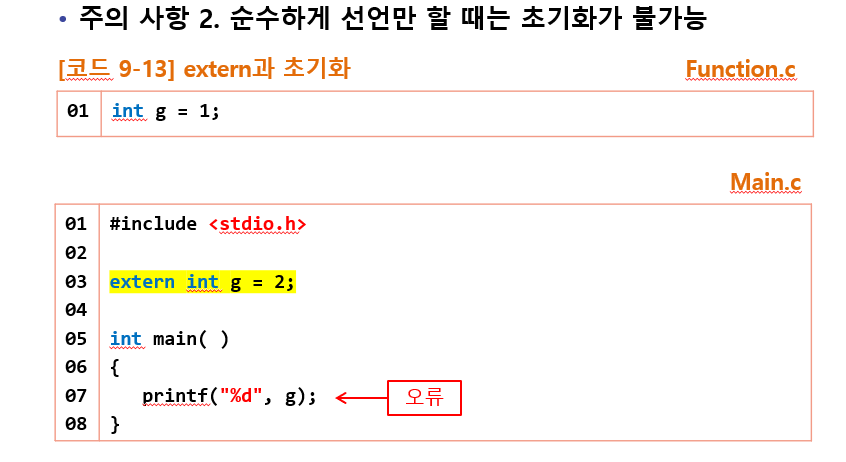

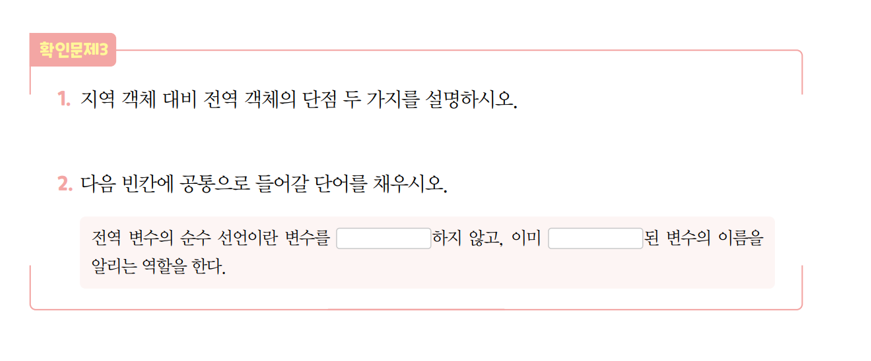  
1.<span style="color:gray;font-size:17px"><br>단점1: 전역객체는 모두 같은 가시 범위를 가지므로 구분을 위해 서로 다른 이름 사용, 혼자 개발하다면 상관없으나, <br>
공동 작업을 하거나 외부 소스를 사용할 경우 이름 충돌의 문제가 발생<br>단점2: 전역객체의 생명주기는 프로그램 시작부터 끝까지 영향을 주기 때문에 무분별한 전역객체 사용을 자제하여<br> 비효율적인 메모리 사용을 줄여야한다.</span><br>
2.<span style="color:gray;font-size:17px"><br>정의</span>

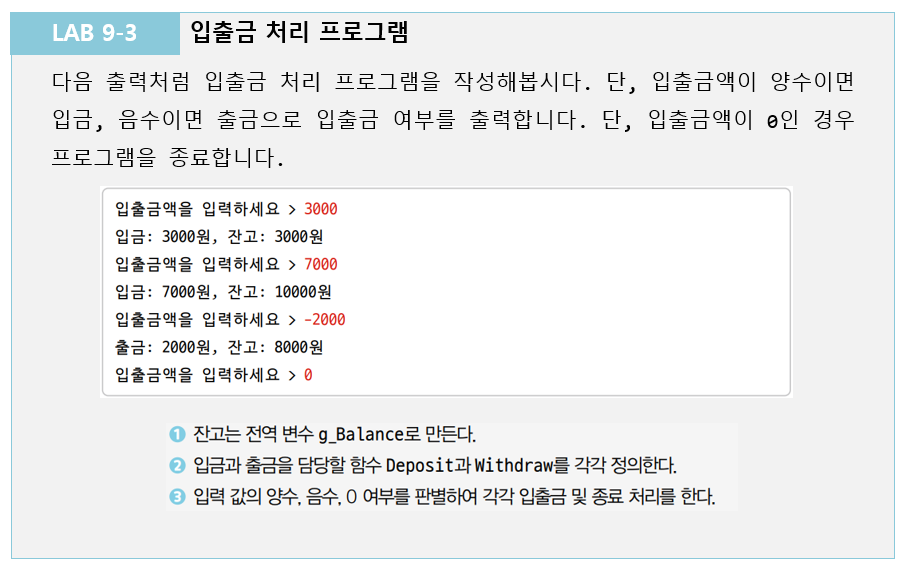

# 해답 및 실행 (참조파일: <a href="lecture9-lab9_3.ipynb"><font color=red>lecture9-lab9_3.ipynb</font></a> )
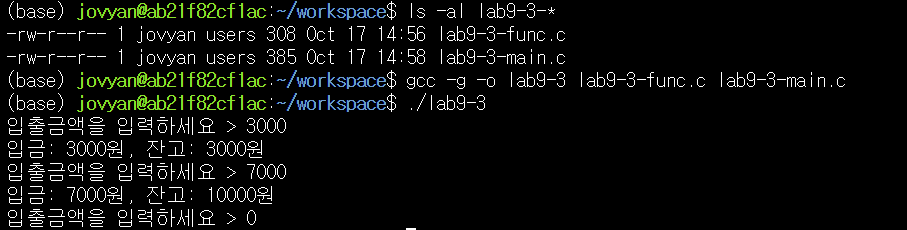

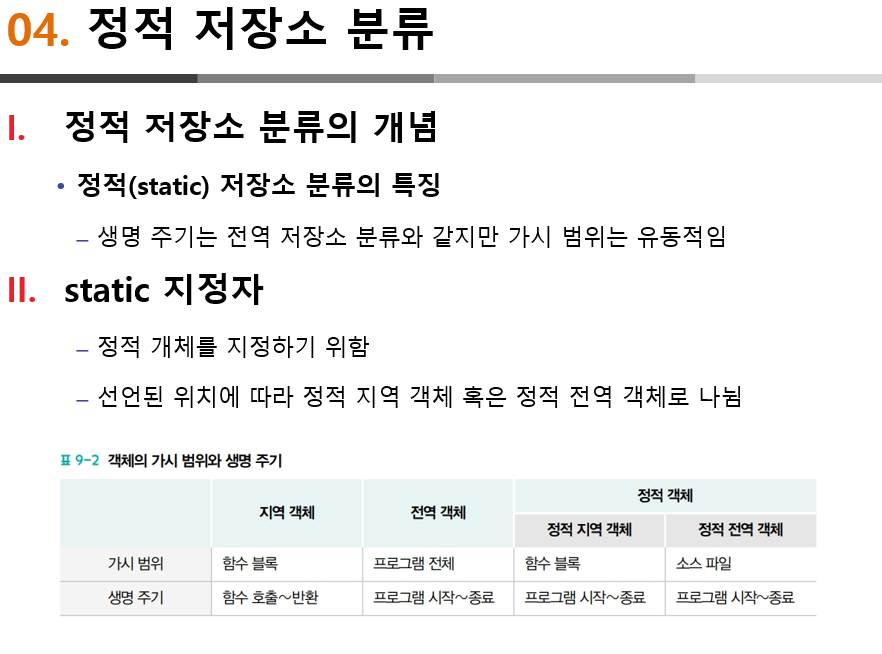

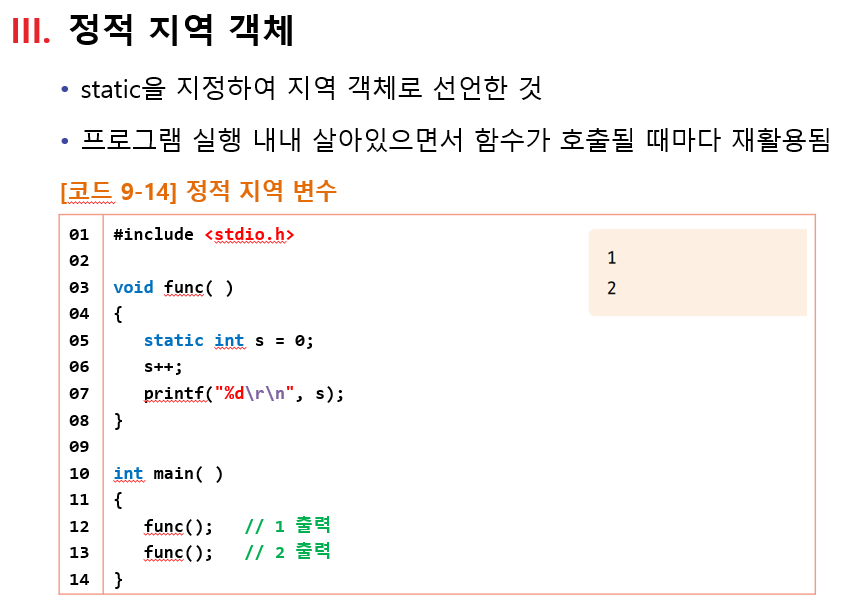

In [ ]:
#include <stdio.h>

void func( )
{
   static int s = 0;
   s++;
   printf("%d\r\n", s);
}

int main( )
{
   func();   // 1 출력
   func();   // 2 출력
}


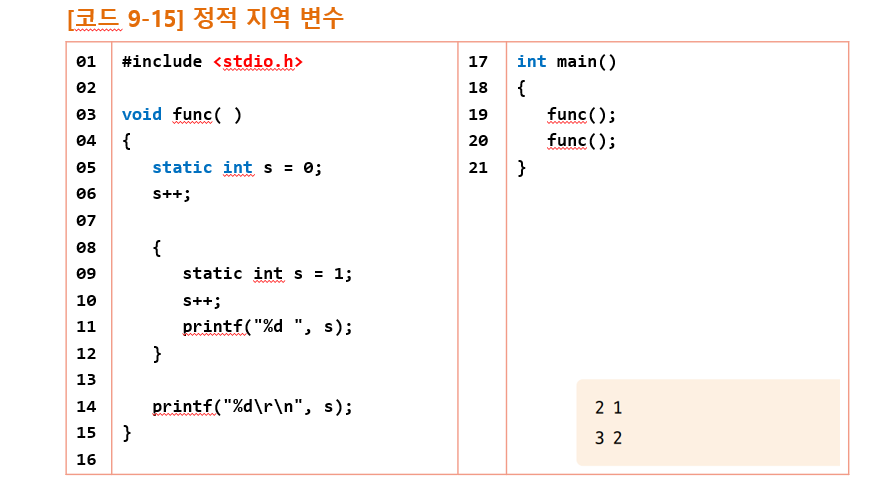

In [ ]:
#include <stdio.h>

void func( )
{
   static int s = 0;
   s++;

   {
      static int s = 1;
      s++;
      printf("%d ", s);
   }

   printf("%d\r\n", s);
}
int main()
{
   func();
   func();
}

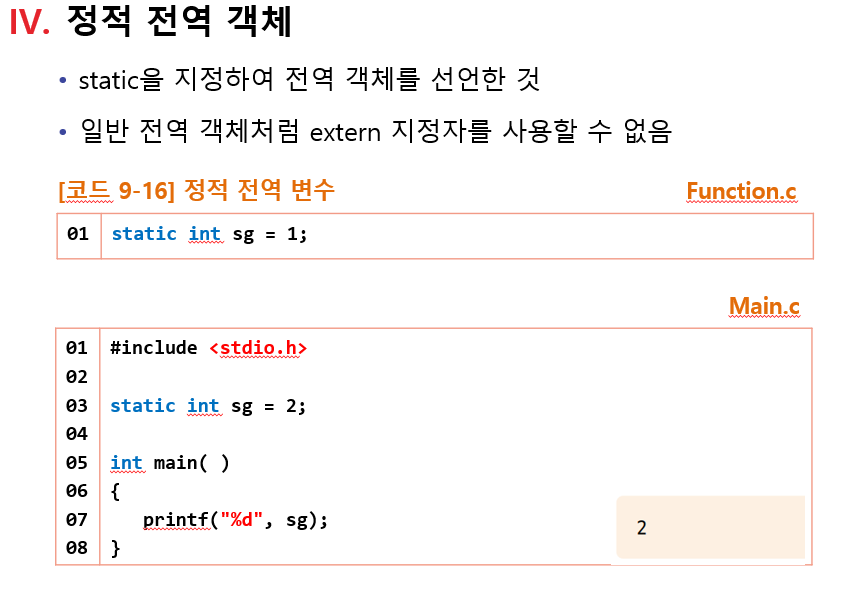

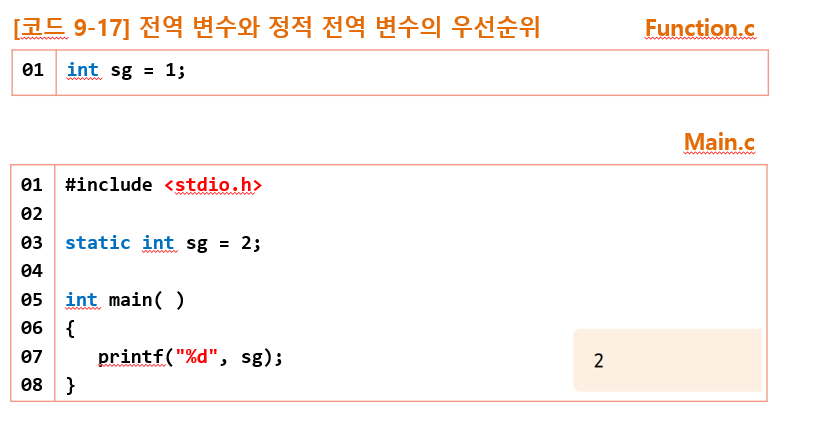

# <a href="lecture9-static.ipynb">참조파일: <font color='red'>lecture9-static.ipynb </font></a>

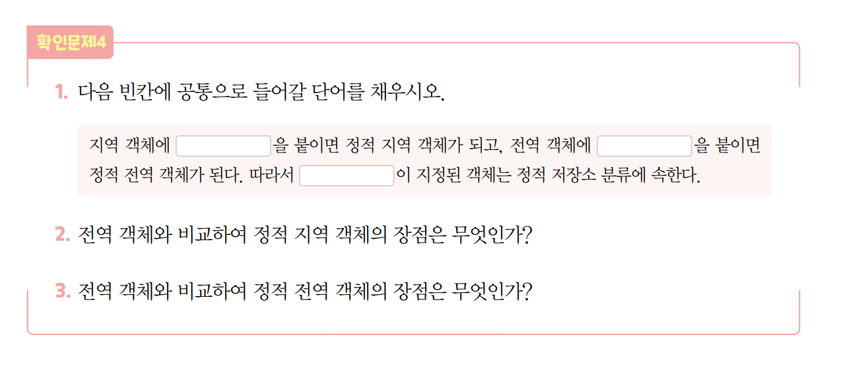  
1. <span style="color:gray;font-size:17px;">static</span>  
2. <span style="color:gray;font-size:17px;">전역객체와 정적 지역 객체는 가시범위만 다르므로 함수별로 이름만 같고 서로 다른 정적 지역 객체를 사용할 수 있다.<br>
또한 정적 지역 객체가 선언된 함수에서만 사용 가능하므로 다른 함수에서 잘못된 사용을 원천적으로 차단할 수 있다.</span>
3. <span style="color:gray;font-size:17px;">전역객체와 정적 전역 객체는 가시범위만 다르므로 소스 파일별로 이름만 같고 서로 다른 정적 전역 객체를 사용할 수 있다.<br>
또한 정적 전역 객체가 선언된 소스 파일에서만 사용 가능하므로 다른 소스 파일에서 잘못된 사용을 원천적으로 차단할 수 있다.</span>


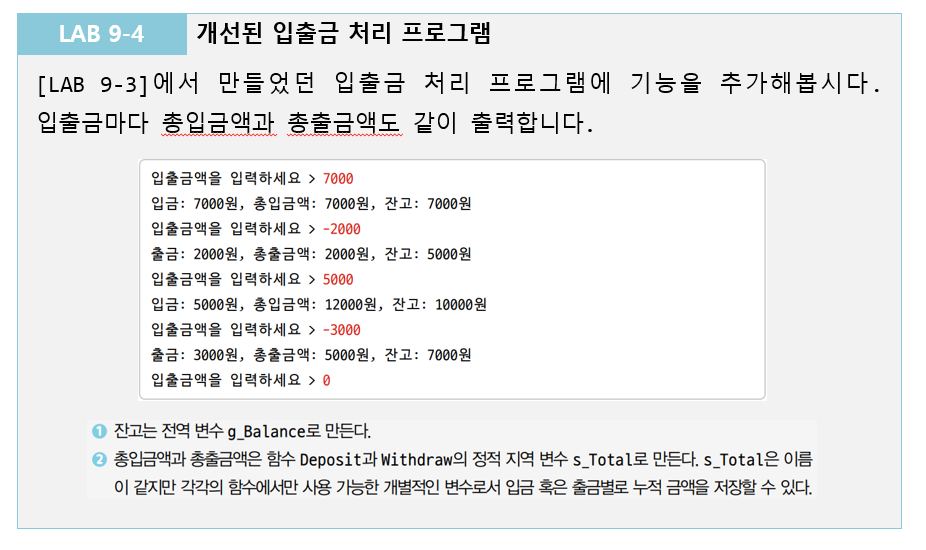

In [ ]:
//파일명: lab9-4-func.c
#include <stdio.h>

int g_Balance = 0;

void Deposit(int amount)
{
   static int s_Total = 0;

   g_Balance += amount;
   s_Total += amount;
   printf("입금: %d원, 총입금액: %d원, 잔고: %d원\r\n",
                   amount, s_Total, g_Balance);
}
void Withdraw(int amount)
{
   static int s_Total = 0;

   g_Balance -= amount;
   s_Total += amount;
   printf("출금: %d원, 총출금액: %d원, 잔고: %d원\r\n",
                 amount, s_Total, g_Balance);
}

In [ ]:
// 파일명: lab9-4-main.c
#include <stdio.h>
extern int g_Balance;
void Deposit(int amount);
void Withdraw(int amount);
int main(){
    int amount;
    while(1){
      printf("입출금액을 입력하세요 > ");
      scanf("%d", &amount);

      if(amount > 0)
         Deposit(amount);
      else if(amount < 0)
         Withdraw(-amount);
      else
         break;
    }
    return 0;
}

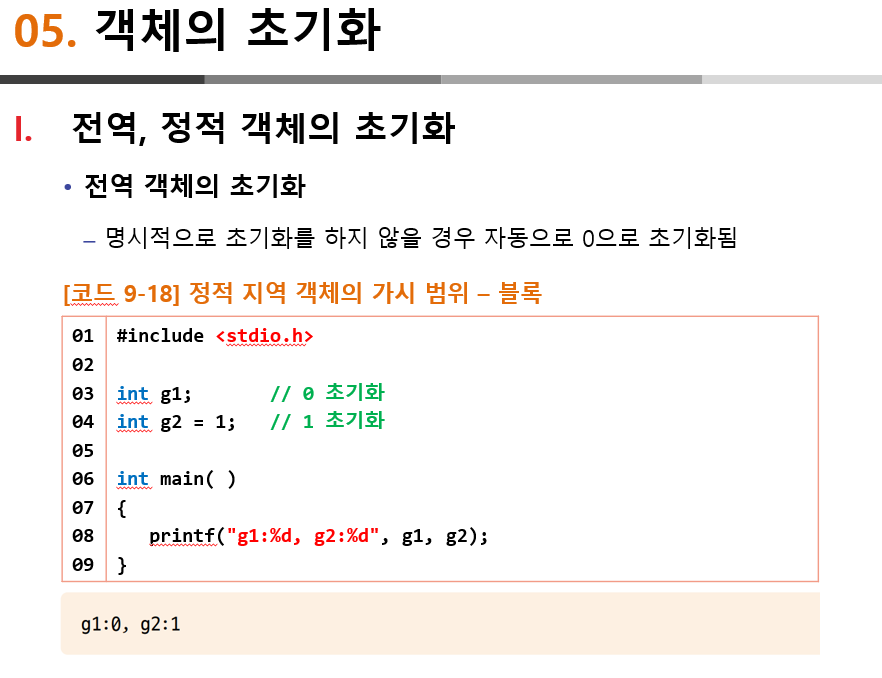

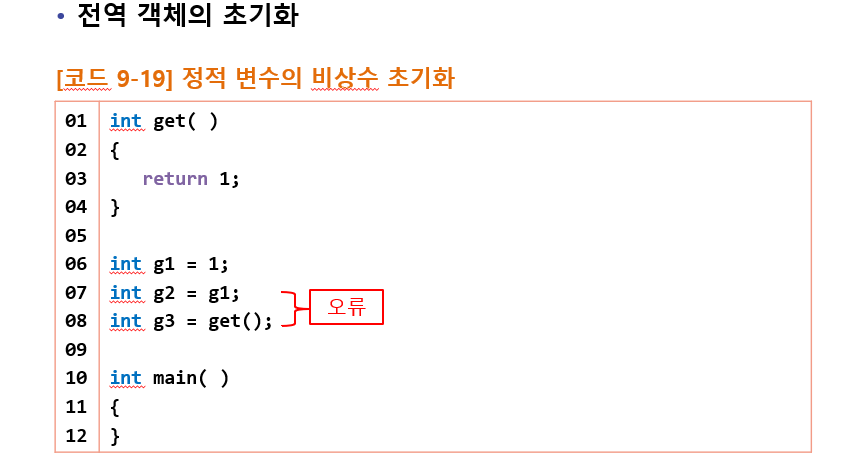

In [ ]:
int get( )
{
   return 1;
}

int g1 = 1;
int g2 = g1; 
int g3 = get(); 

int main( )
{
}


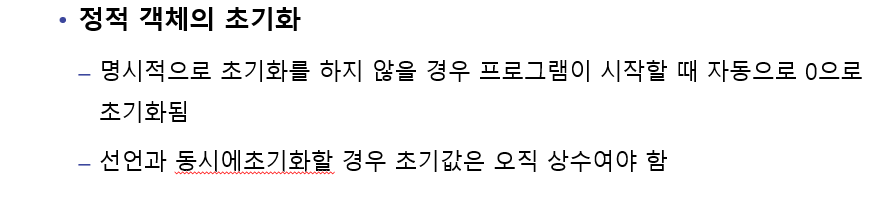

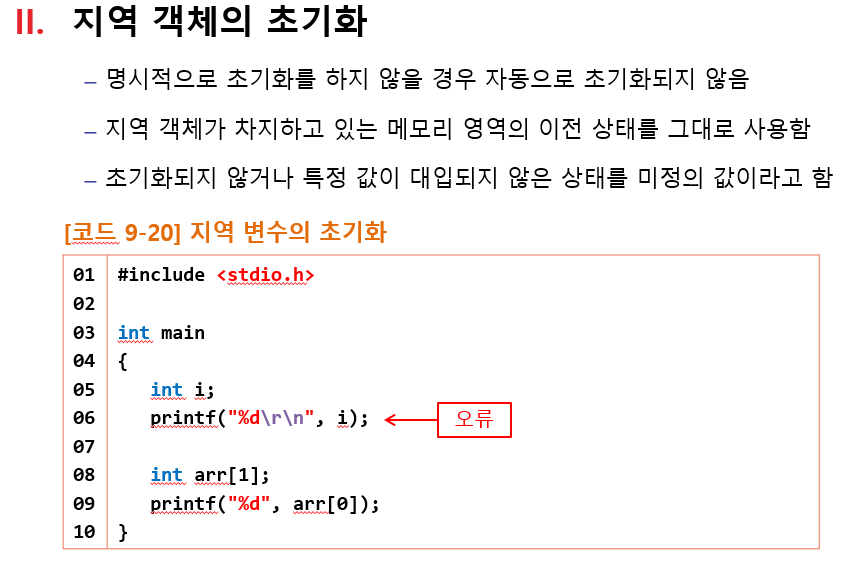

In [ ]:
#include <stdio.h>

int main()
{
   int i;
   printf("%d\r\n", i);

   int arr[1];
   printf("%d", arr[0]);
}


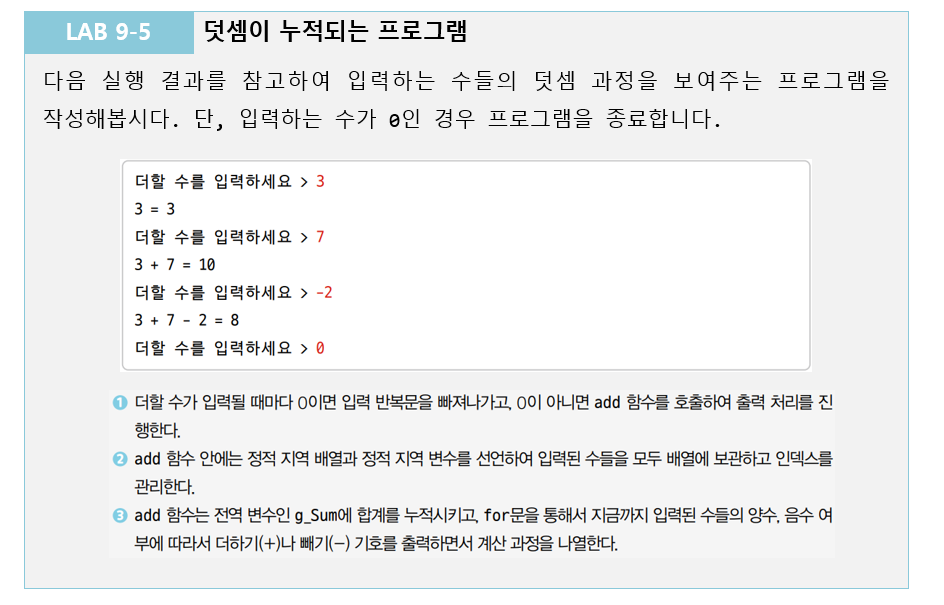

In [ ]:
// 파일명: lab9-5.c
#include <stdio.h>

int g_Sum;

void add(int n)
{
   static int s_Index;
   static int s_Arr[1024];

   g_Sum += n;
   s_Arr[s_Index] = n;
   s_Index++;

   printf("%d ", s_Arr[0]);
   for(int i = 1; i < s_Index; i++)
   {
      if(s_Arr[i] > 0)
         printf("+ %d ", s_Arr[i]);
      else if(s_Arr[i] < 0)
         printf("- %d ", -s_Arr[i]);
   }

   printf("= %d\r\n", g_Sum);
 }

int main( )
{
   while(1)
   {
         int n;
         printf("더할 수를 입력하세요 > ");
         scanf("%d", &n);

         if(n)
            add(n);
         else
            break;
   } 
}


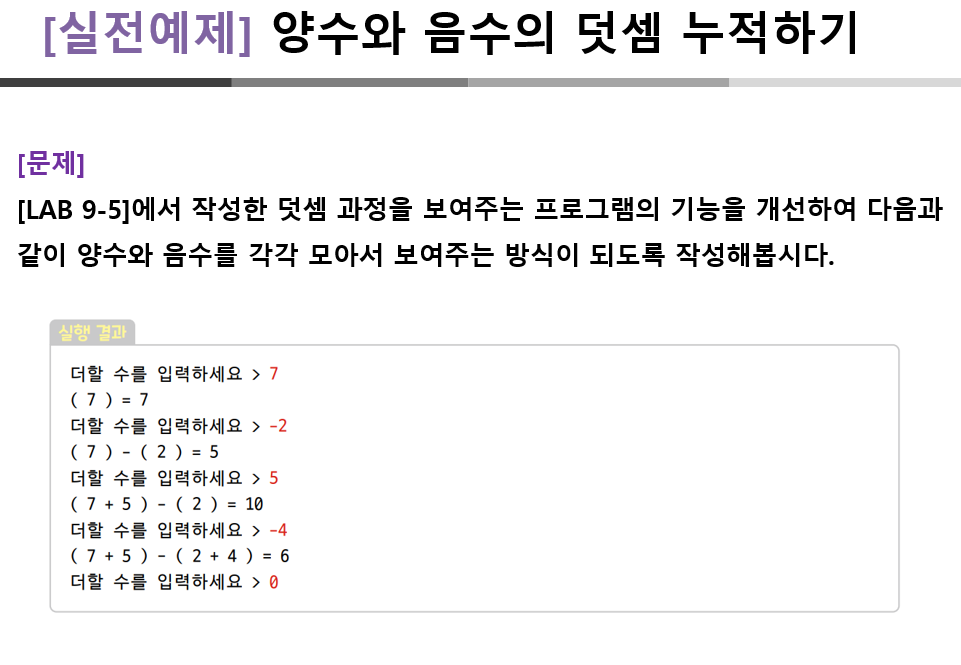  
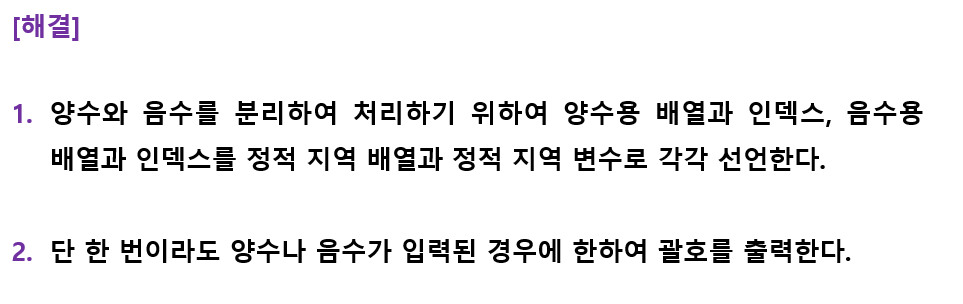

In [ ]:
// 파일명: plus-minus.c
#include <stdio.h>

int g_Sum;

void add(int n)
{
   static int s_plusIndex;
   static int s_plusArr[256];

   static int s_minusIndex;
   static int s_minusArr[256];

   g_Sum += n;

   if(n > 0)
   {
      s_plusArr[s_plusIndex] = n;
      s_plusIndex++;
   }
   else if(n < 0)
   {
       s_minusArr[s_minusIndex] = n;
        s_minusIndex++;
   }

   if(s_plusIndex > 0)
   {
      printf("( %d ", s_plusArr[0]);
      for(int i = 1; i < s_plusIndex; i++)
         printf("+ %d ", s_plusArr[i]);

      printf(")");
   }

   if(s_minusIndex > 0)
   {
      printf(" - ( %d ", -s_minusArr[0]);
      for(int i = 1; i < s_minusIndex; i++)
         printf("+ %d ", -s_minusArr[i]);

      printf(")");
   }

   printf(" = %d\r\n", g_Sum);
}

int main()
{
   while(1)
   {
      int n;
      printf("더할 수를 입력하세요 > ");
      scanf("%d", &n);
      if(n)
         add(n);
      else
         break;
   }
}  